In [1]:
import os
import librosa, librosa.display
import IPython.display as ipd
import math
import json 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
data_PATH = './data/genres_original'
json_PATH = 'data.json'
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [3]:
print(list(os.listdir(data_PATH)))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


# Looking in to few data

In [4]:
FIG_SIZE = (15,10)
def plot_sound(path):
    plt.figure(figsize = FIG_SIZE)
    x, sr = librosa.load(path)
    print("length {}, samplerate {}".format(x.shape, sr))
    librosa.display.waveplot(x, sr=sr)
    
    return x

length (661794,), samplerate 22050


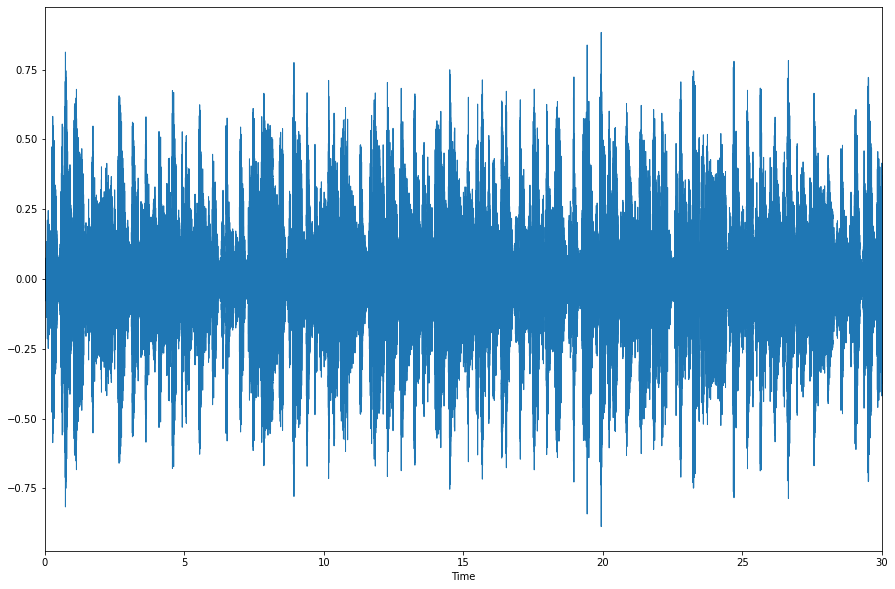

In [5]:
example_blues = './data/genres_original/blues/blues.00000.wav'
blues_audio = plot_sound(example_blues)
ipd.Audio(example_blues)

length (661794,), samplerate 22050


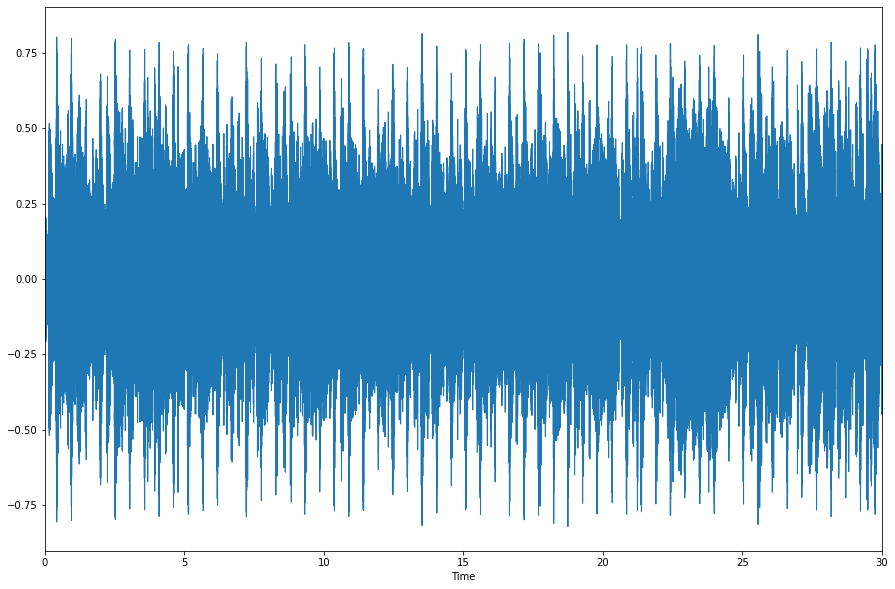

In [6]:
example_disco = './data/genres_original/disco/disco.00002.wav'
disco_audio = plot_sound(example_disco)
ipd.Audio(example_disco)

length (661794,), samplerate 22050


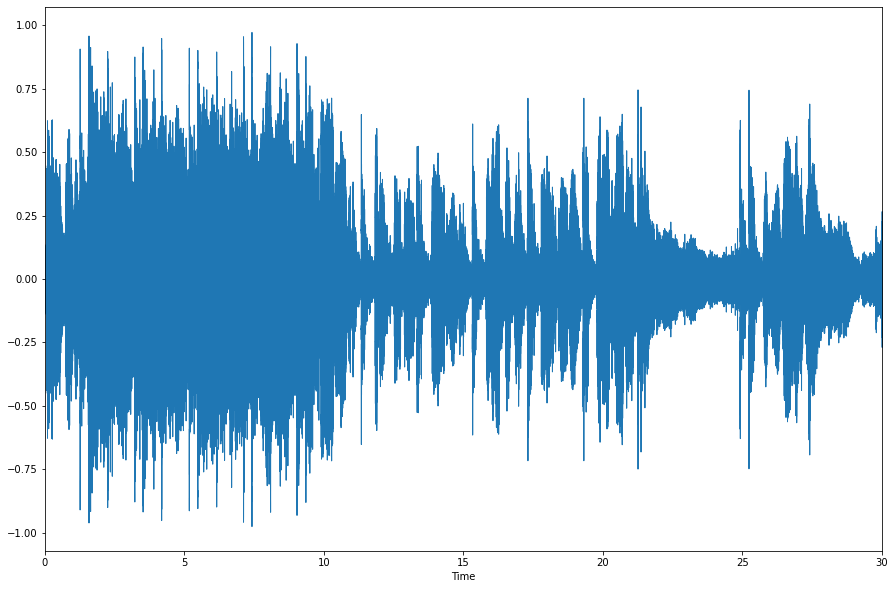

In [7]:
example_rock = './data/genres_original/rock/rock.00000.wav'
rock_audio = plot_sound(example_rock)
ipd.Audio(example_rock)

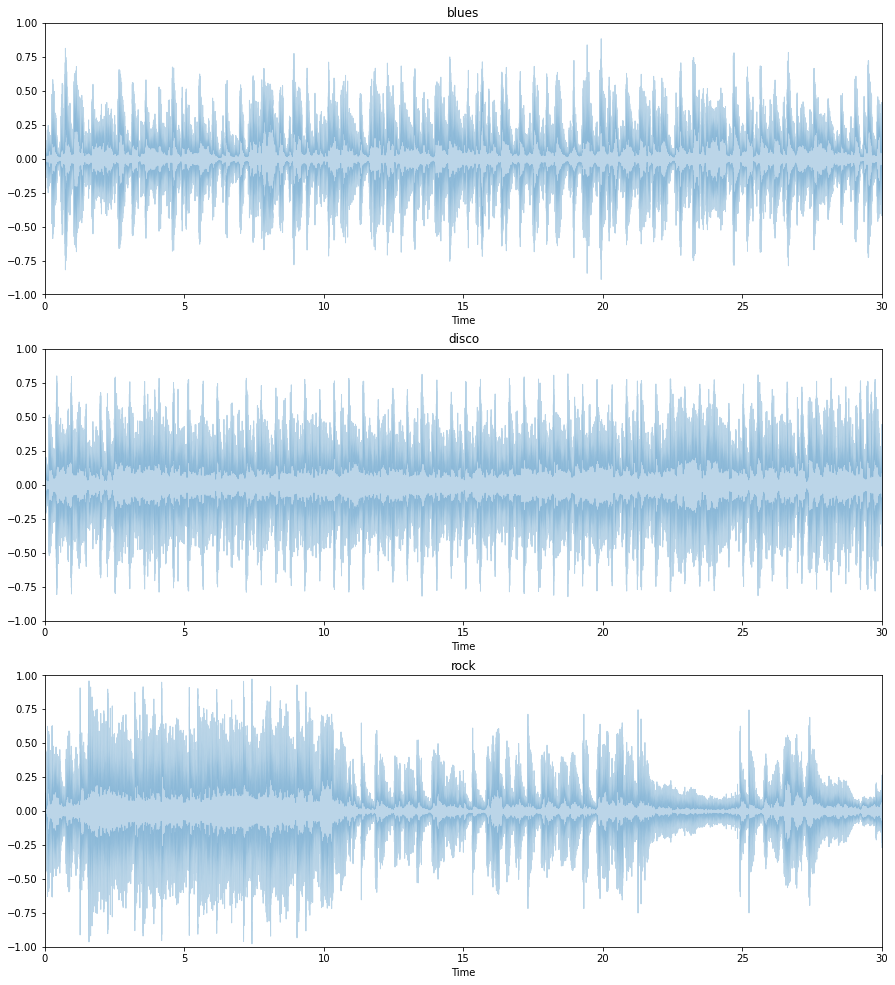

In [8]:
plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(blues_audio, alpha = 0.3)
plt.title("blues")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(disco_audio, alpha = 0.3)
plt.title("disco")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock_audio, alpha = 0.3)
plt.title("rock")
plt.ylim((-1,1))

plt.show()

# Amplitude Envelope

In [9]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

'''
def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
        
    return np.array(amplitude_envelope)
    
fancy_ae_blues = fancy_ae(blues_audio, FRAME_SIZE,HOP_LENGTH)

(ae_blues == fancy_ae_blues).all() -> TRUE
'''

def ae(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [10]:
ae_blues = ae(blues_audio, FRAME_SIZE, HOP_LENGTH)
ae_disco = ae(disco_audio, FRAME_SIZE, HOP_LENGTH)
ae_rock = ae(rock_audio, FRAME_SIZE, HOP_LENGTH)
print(len(ae_blues))
print(len(ae_disco))
print(len(ae_rock))

1293
1293
1293


In [11]:
#visualization of amplitude envelope for the audio a

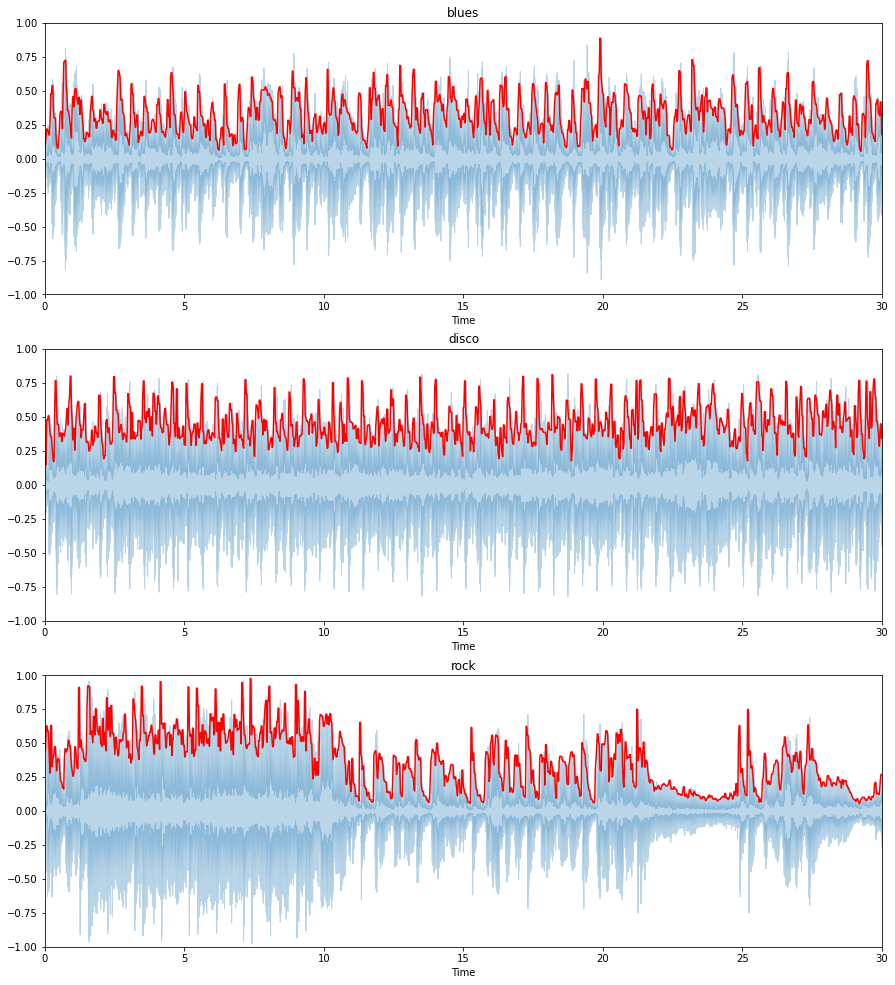

In [12]:
#visualization of amplitude envelope for the audio examples

frames = range(0, ae_blues.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(blues_audio, alpha = 0.3)
plt.plot(t, ae_blues, color='r')
plt.title("blues")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(disco_audio, alpha = 0.3)
plt.plot(t, ae_disco, color='r')
plt.title("disco")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock_audio, alpha = 0.3)
plt.plot(t, ae_rock, color='r')
plt.title("rock")
plt.ylim((-1,1))

plt.show()

# RMS Energy and ZCR

In [13]:
FRAME_SIZE_LENGTH = 1024
HOP_LENGTH = 512

rms_blues = librosa.feature.rms(blues_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_disco = librosa.feature.rms(disco_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_rock = librosa.feature.rms(rock_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

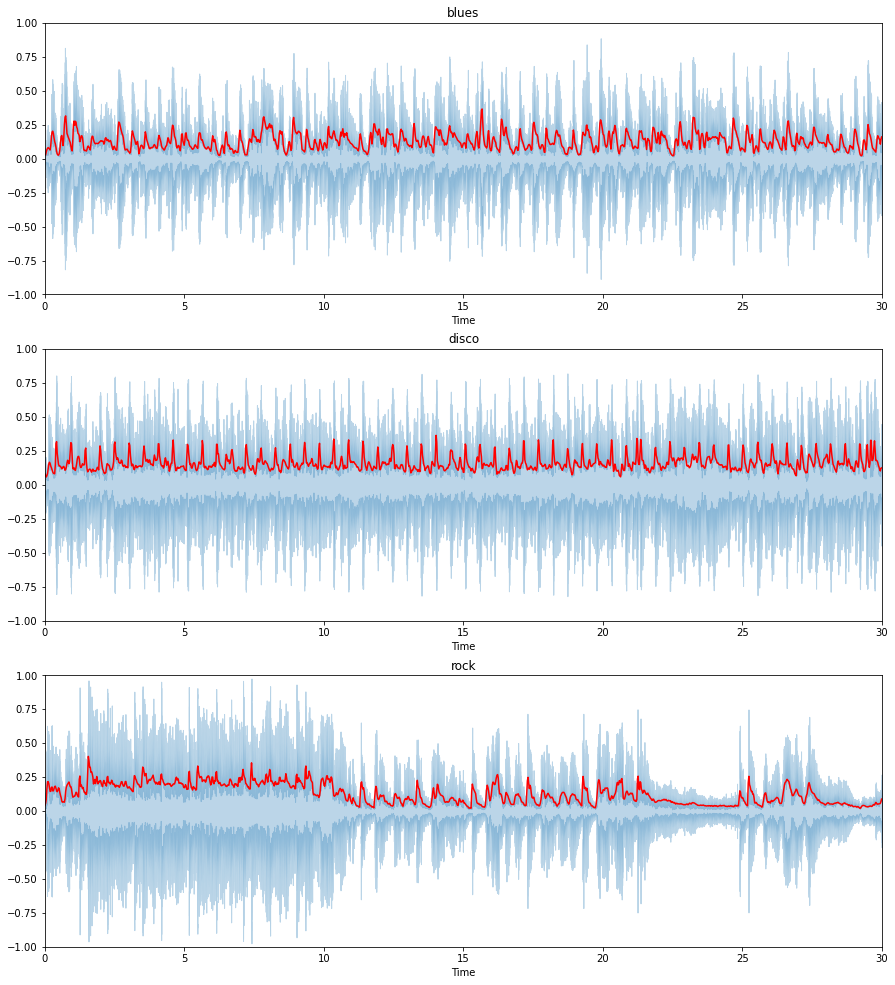

In [14]:
frames = range(len(rms_blues))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(blues_audio, alpha = 0.3)
plt.plot(t, rms_blues, color='r')
plt.title("blues")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(disco_audio, alpha = 0.3)
plt.plot(t, rms_disco, color='r')
plt.title("disco")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(rock_audio, alpha = 0.3)
plt.plot(t, rms_rock, color='r')
plt.title("rock")
plt.ylim((-1,1))

plt.show()

In [15]:
# Zero-crossing rate

zcr_blues = librosa.feature.zero_crossing_rate(blues_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_disco = librosa.feature.zero_crossing_rate(disco_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_rock = librosa.feature.zero_crossing_rate(rock_audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

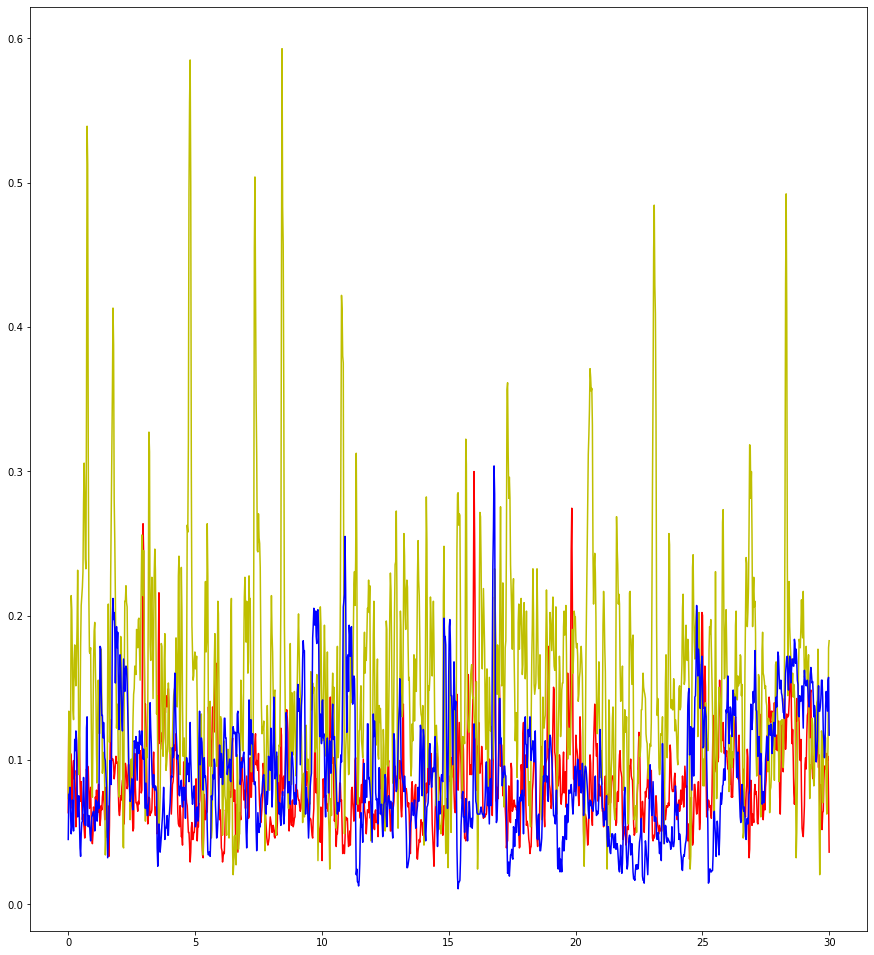

In [17]:
plt.figure(figsize = (15,17))

#NORMALIZED
plt.plot(t, zcr_blues, color ='r')
plt.plot(t, zcr_disco, color ='y')
plt.plot(t, zcr_rock, color ='b')

'''
#ACTUAL VALUE
plt.plot(t, zcr_blues * FRAME_SIZE, color ='r')
plt.plot(t, zcr_disco * FRAME_SIZE, color ='y')
plt.plot(t, zcr_rock * FRAME_SIZE, color ='b')
'''

plt.show()

# Spectral Centroid, BANDWITH (Frequency)

In [20]:
blues_audio, sr = librosa.load(example_blues)
disco_audio, _ = librosa.load(example_disco)
rock_audio, _ = librosa.load(example_rock)

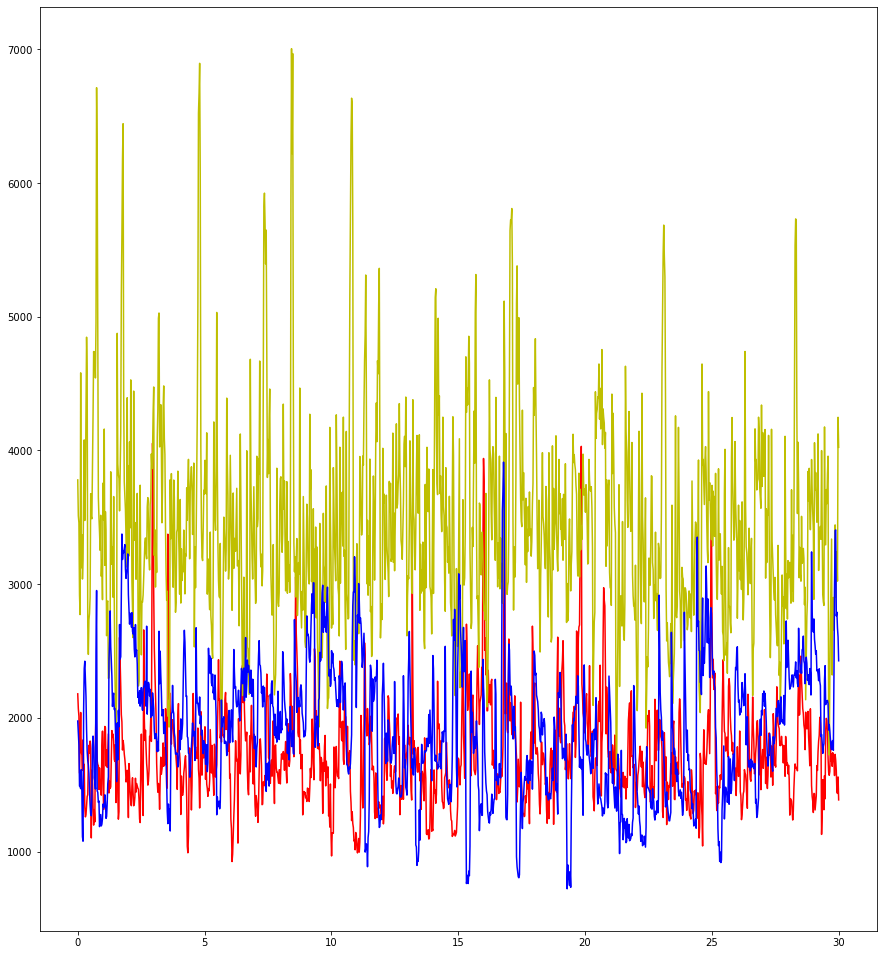

In [26]:
sc_blues = librosa.feature.spectral_centroid(y=blues_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_disco = librosa.feature.spectral_centroid(y=disco_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_rock = librosa.feature.spectral_centroid(y=rock_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

plt.figure(figsize = (15,17))

#NORMALIZED
plt.plot(t, sc_blues, color ='r')
plt.plot(t, sc_disco, color ='y')
plt.plot(t, sc_rock, color ='b')

plt.show()

In [74]:
librosa.feature.spectral_bandwidth(y=blues_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

array([2381.7233441 , 2215.58049814, 2327.24172127, ..., 1428.61593188,
       1750.11537666, 1710.36888259])

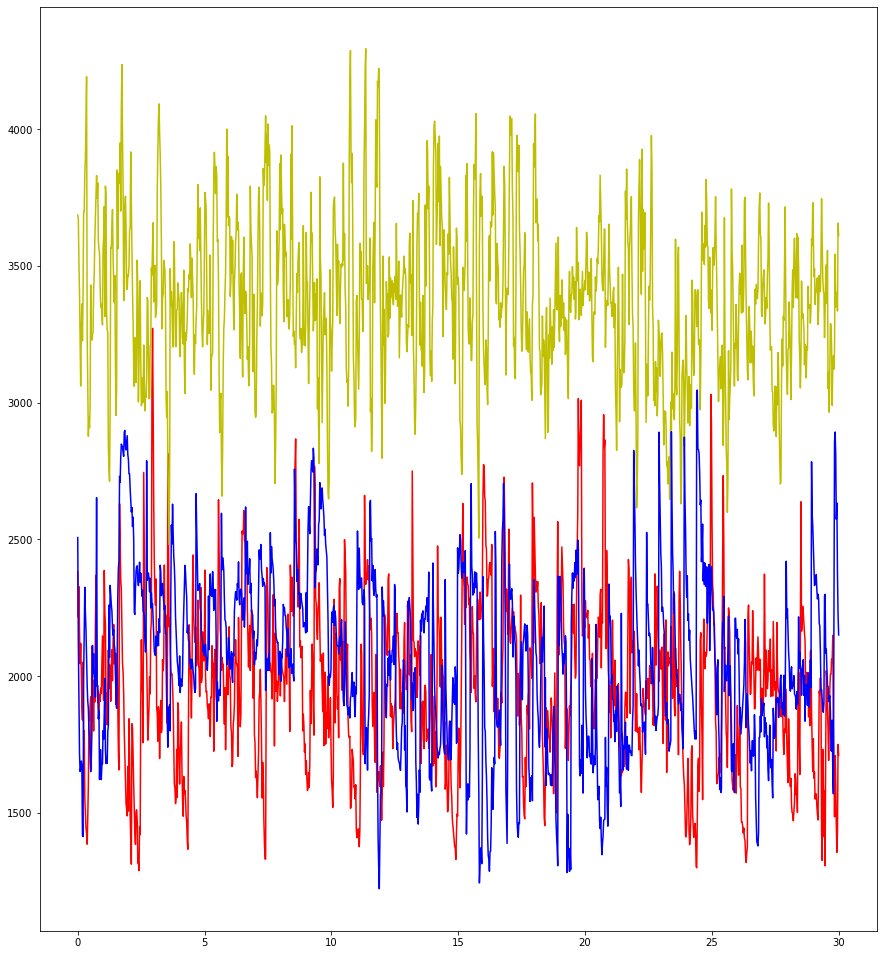

In [28]:
ban_blues = librosa.feature.spectral_bandwidth(y=blues_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_disco = librosa.feature.spectral_bandwidth(y=disco_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_rock = librosa.feature.spectral_bandwidth(y=rock_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

plt.figure(figsize = (15,17))

#NORMALIZED
plt.plot(t, ban_blues, color ='r')
plt.plot(t, ban_disco, color ='y')
plt.plot(t, ban_rock, color ='b')

plt.show()

# MFCC

In [29]:
mfcc_blues = librosa.feature.mfcc(blues_audio, n_mfcc=13, sr=sr)
mfcc_disco = librosa.feature.mfcc(disco_audio, n_mfcc=13, sr=sr)
mfcc_rock = librosa.feature.mfcc(rock_audio, n_mfcc=13, sr=sr)

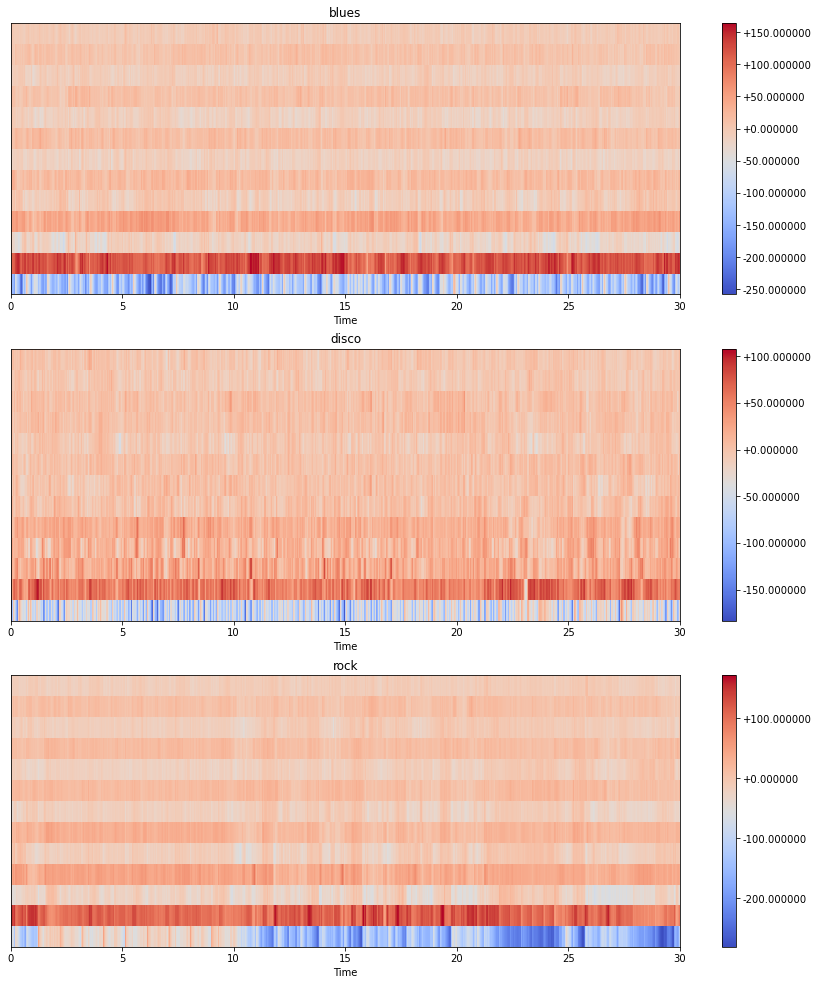

In [30]:
plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc_blues, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("blues")

plt.subplot(3,1,2)
librosa.display.specshow(mfcc_disco, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("disco")

plt.subplot(3,1,3)
librosa.display.specshow(mfcc_rock, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("rock")

plt.show()

In [34]:
#delta_mfcc , delta2mfcc
dm_blues = librosa.feature.delta(mfcc_blues)
d2m_blues = librosa.feature.delta(mfcc_blues, order=2)
dm_disco = librosa.feature.delta(mfcc_disco)
d2m_disco = librosa.feature.delta(mfcc_disco, order=2)
dm_rock = librosa.feature.delta(mfcc_rock)
d2m_rock = librosa.feature.delta(mfcc_rock, order=2)

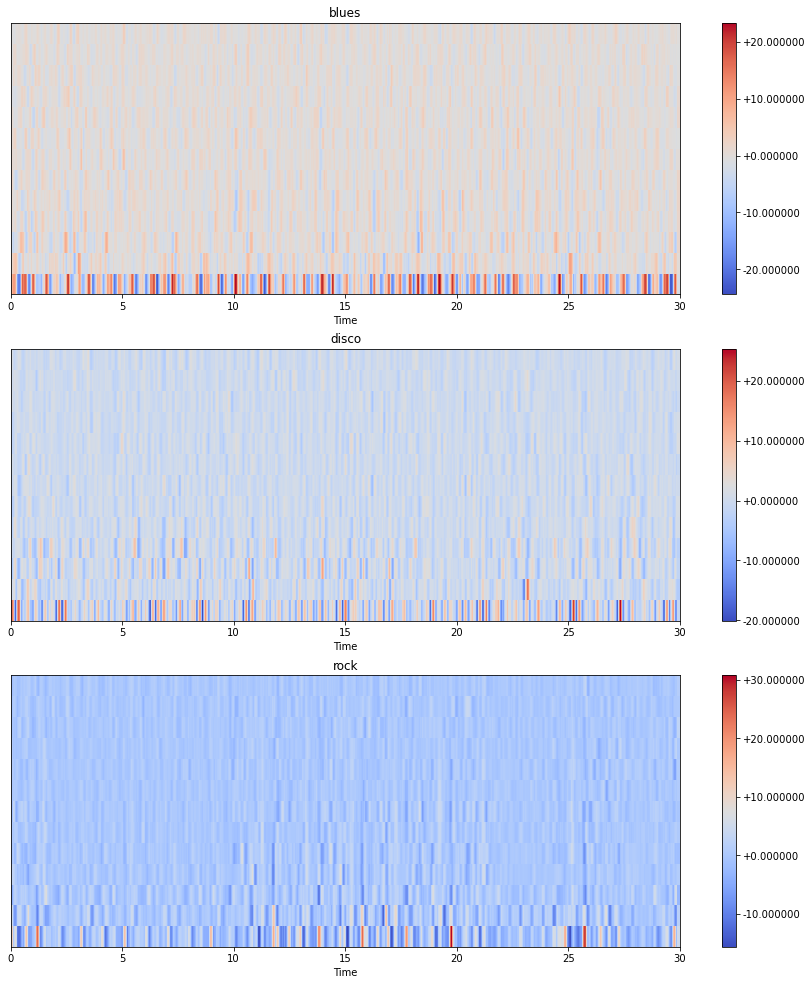

In [35]:
plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.specshow(dm_blues, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("blues")

plt.subplot(3,1,2)
librosa.display.specshow(dm_disco, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("disco")

plt.subplot(3,1,3)
librosa.display.specshow(dm_rock, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("rock")

plt.show()

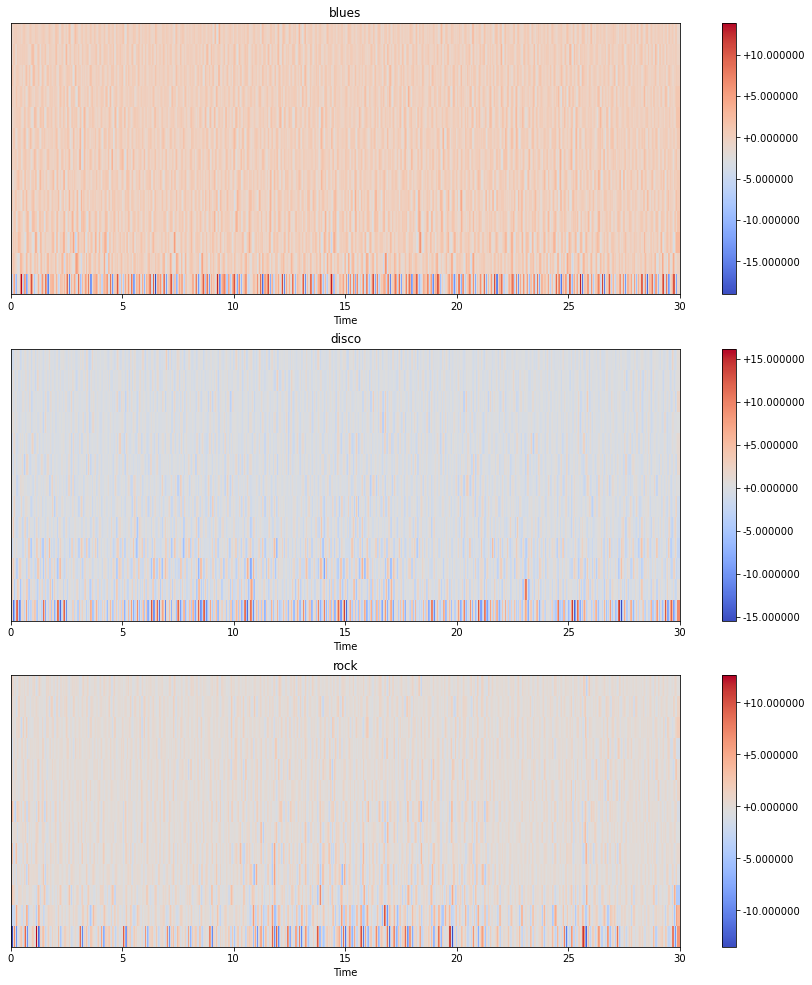

In [36]:
plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.specshow(d2m_blues, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("blues")

plt.subplot(3,1,2)
librosa.display.specshow(d2m_disco, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("disco")

plt.subplot(3,1,3)
librosa.display.specshow(d2m_rock, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.title("rock")

plt.show()

In [37]:
comprehensive_mfcc = np.concatenate((mfcc_blues, dm_blues,d2m_blues))

In [38]:
comprehensive_mfcc.shape

(39, 1293)

# chroma feature

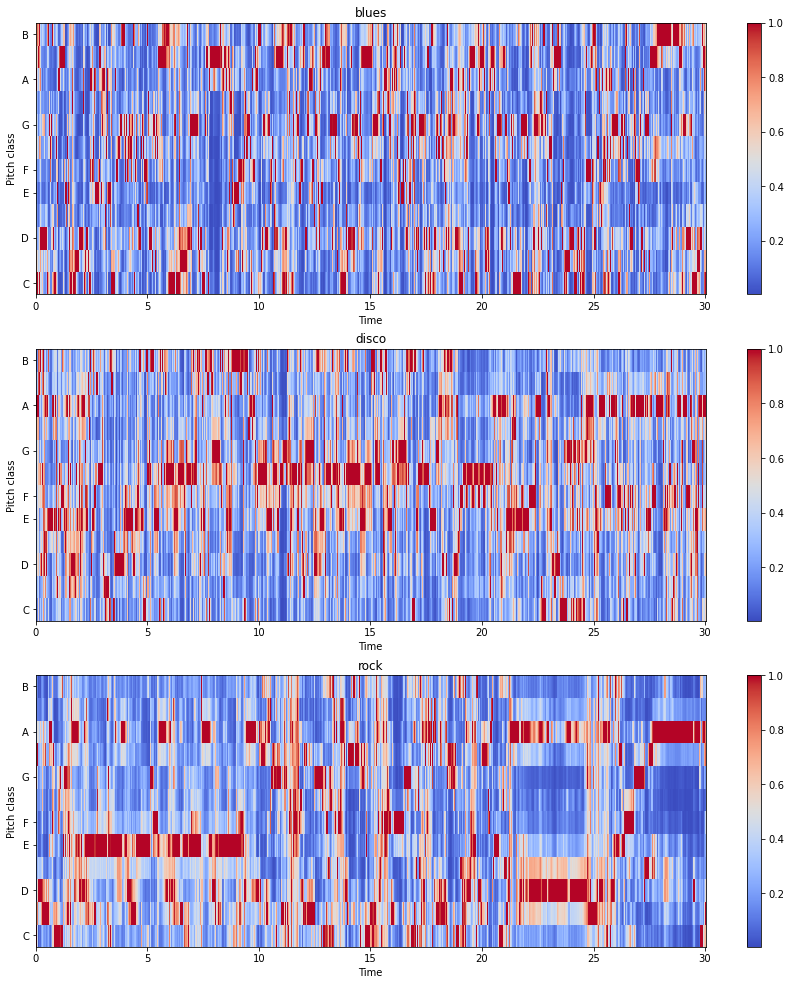

In [50]:
chroma_blues = librosa.feature.chroma_stft(blues_audio, sr=sr)
chroma_disco = librosa.feature.chroma_stft(disco_audio, sr=sr)
chroma_rock = librosa.feature.chroma_stft(rock_audio, sr=sr)


plt.figure(figsize = (15,17))

plt.subplot(3,1,1)
librosa.display.specshow(chroma_blues, x_axis="time", y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("blues")

plt.subplot(3,1,2)
librosa.display.specshow(chroma_disco, x_axis="time",  y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("disco")

plt.subplot(3,1,3)
librosa.display.specshow(chroma_rock, x_axis="time",  y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("rock")

plt.show()

In [62]:
np.mean(chroma_blues)

0.35008812

In [77]:
df = pd.read_csv('./data/features_30_sec.csv')

In [78]:
df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.002827             1784.165850          129774.064525   
1    0.002373             1530.176679          375850.073649   
2    0.002746             1552.811865          156467.643368   
3    0.006346             1070.106615          184355.942417   
4    0.002303             1835.004266          343399.939274   
..        ...                     ...                    ...   
995  0.000345             2008.149458          282174.689224   
996  0.000588             2006.843354          182114.709510   
997  0.000322             2077.526598          231657.968040   
998  0.001211             1398.699344          240318.731073   
999  0.000336             1609.795082          422203.216152   

     spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                2002.449060            85882.761315  ...   52.420910   
1                2039.036516           213843.755497  ...   55.356403   
2                1747.702312            76254.192257  ...   40.598766   
3                1596.412872           166441.494769  ...   44.427753   
4                1748.172116            88445.209036  ...   86.099236   
..                       ...                     ...  ...         ...   
995              2106.541053            88609.749506  ...   45.050526   
996              2068.942009            82426.016726  ...   33.851742   
997              1927.293153            74717.124394  ...   33.597008   
998              1818.450280           109090.207161  ...   46.324894   
999              1797.213044           120115.632927  ...   59.167755   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0      -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1      -0.731125   60.314529     0.295073   48.120598    -0.283518   
2      -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3      -3.319597   50.206673     0.636965   37.319130    -0.619121   
4      -5.454034   75.269707    -0.916874   53.613918    -4.404827   
..           ...         ...          ...         ...          ...   
995   -13.289984   41.754955     2.484145   36.778877    -6.713265   
996   -10.848309   39.395096     1.881229   32.010040    -7.461491   
997   -12.845291   36.367264     3.440978   36.001110   -12.588070   
998    -4.416050   43.583942     1.556207   34.331261    -5.041897   
999    -7.069775   73.760391     0.028346   76.504326    -2.025783   

     mfcc19_var  mfcc20_mean  mfcc20_var  label  
0     55.062923     1.221291   46.936035  blues  
1     51.106190     0.531217   45.786282  blues  
2     46.639660    -2.231258   30.573025  blues  
3     37.259739    -3.407448   31.949339  blues  
4     62.910812   -11.703234   55.195160  blues  
..          ...          ...         ...    ...  
995   54.866825    -1.193787   49.950665   rock  
996   39.196327    -2.795338   31.773624   rock  
997   42.502201    -2.106337   29.865515   rock  
998   47.227180    -3.590644   41.299088   rock  
999   72.189316     1.155239   49.662510   rock  


In [76]:
def load_data(dataset_path):
    with open(dataset_path,"r") as f:
        data = json.load(f)
    
    # Convert list to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])    
    
    return inputs,targets

with open(json_PATH,"r") as f:
        data = json.loads(f)

TypeError: the JSON object must be str, bytes or bytearray, not TextIOWrapper